## Machine Learning Model for Churn Prediction


## Import Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read Telco_customer_churn.csv as a dataframe called churns.**

** About the dataset **

The sample data tracks a fictional telecommunications company, Telco. It’s customer churn data sourced by the IBM Developer Platform. It includes a target label indicating whether or not the customer left within the last month, and other dependent features that cover demographics, services that each customer has signed up for, and customer account information. It has data for 7043 clients, with 20 features.



In [2]:
churns=pd.read_csv('Telco_customer_churn.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
churns.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churns.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning

Let's do some data cleaning!
Totalcharges is being seen as a string, I suspect this is because of empty cells (''), in the column -we shall explore this.
The Senior citizen is being read as an int when it should be a categorical variable of Yes/no we shall explore this as well

** Create a heatmap showing if there is any missing data for the TotalCharges column.**



In [17]:
churns['TotalCharges'] = churns['TotalCharges'].replace(' ',np.nan)

<AxesSubplot:>

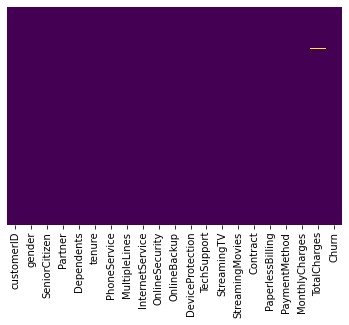

In [18]:
sns.heatmap(churns.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Looks like theres one missing value in total charges column causing it to be seen as a string and we will drop this missing value, then change the totalcharges datatype to float

** As we suspected the missing value caused the TotalCharges column to be interpreted as a string**

In [19]:
churns.dropna(inplace=True)
churns['TotalCharges']=churns['TotalCharges'].astype(float)

In [21]:
# replace values for SeniorCitizen as a categorical feature
churns['SeniorCitizen'] = churns['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [22]:
# data overview
print ('Rows     : ', churns.shape[0])
print ('Columns  : ', churns.shape[1])
print ('\nFeatures : \n', churns.columns.tolist())
print ('\nMissing values :  ', churns.isnull().sum().values.sum())
print ('\nUnique values :  \n', churns.nunique())
churns.info()
churns.isnull().sum()

Rows     :  7032
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

Now that the data is clean, lets do some exploration to find patterns


**Now, let’s plot the demographic features.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

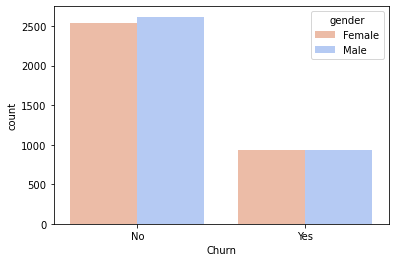

In [24]:
sns.countplot(x='Churn',hue='gender',data=churns,palette='coolwarm_r')

<AxesSubplot:xlabel='Churn', ylabel='count'>

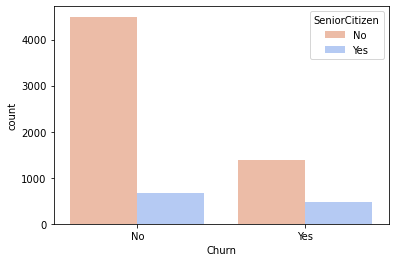

In [52]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=churns,palette='coolwarm_r')

<AxesSubplot:xlabel='Churn', ylabel='count'>

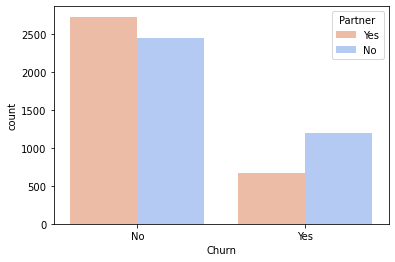

In [53]:
sns.countplot(x='Churn',hue='Partner',data=churns,palette='coolwarm_r')

<AxesSubplot:xlabel='Churn', ylabel='count'>

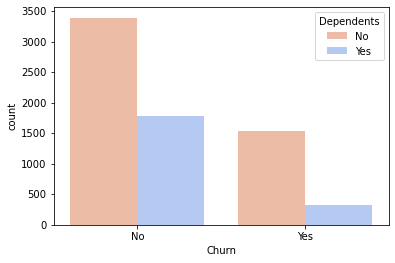

In [54]:
sns.countplot(x='Churn',hue='Dependents',data=churns,palette='coolwarm_r')

**Demographic analysis insight:** Gender and partner are evenly distributed with approximate percentage values. The difference in churn is slightly higher in females, but the small difference can be ignored. There’s a higher proportion of churn in younger customers (SeniorCitizen = No), customers with no partners, and customers with no dependents. The demographic section of data highlights on-senior citizens with no partners and dependents as a particular segment of customers likely to churn.

Next, let’s explore the services that each customer has signed up for.



<AxesSubplot:xlabel='Churn', ylabel='count'>

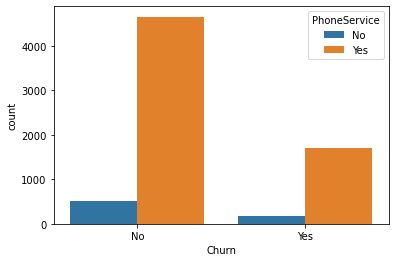

In [55]:
sns.countplot(x='Churn',data=churns, hue='PhoneService')

<AxesSubplot:xlabel='Churn', ylabel='count'>

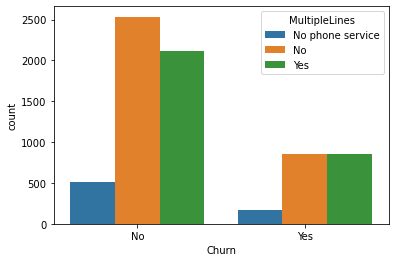

In [56]:
sns.countplot(x='Churn',data=churns, hue='MultipleLines')

<AxesSubplot:xlabel='Churn', ylabel='count'>

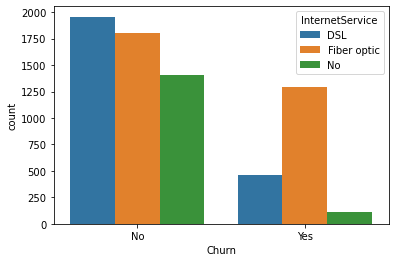

In [40]:
sns.countplot(x='Churn',data=churns, hue='InternetService')

** We can see that people using Fiber-optic services have a higher churn percentage. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

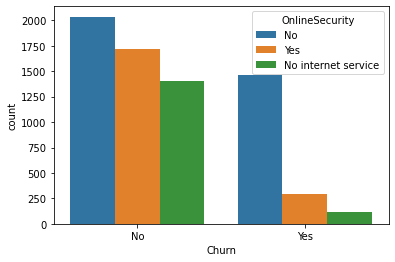

In [46]:
sns.countplot(x='Churn',data=churns, hue='OnlineSecurity')

<AxesSubplot:xlabel='Churn', ylabel='count'>

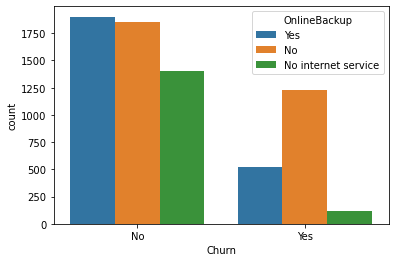

In [47]:
sns.countplot(x='Churn',data=churns, hue='OnlineBackup')

<AxesSubplot:xlabel='Churn', ylabel='count'>

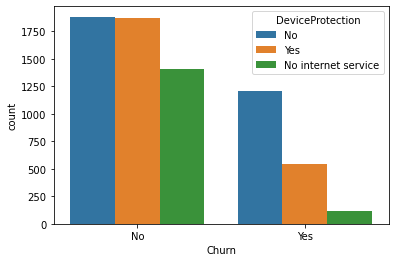

In [57]:
sns.countplot(x='Churn',data=churns, hue='DeviceProtection')

<AxesSubplot:xlabel='Churn', ylabel='count'>

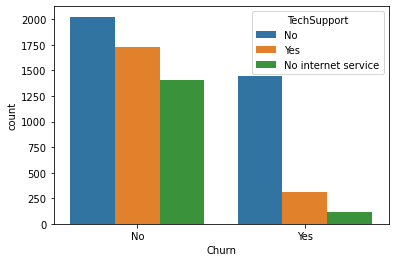

In [58]:
sns.countplot(x='Churn',data=churns, hue='TechSupport')

<AxesSubplot:xlabel='Churn', ylabel='count'>

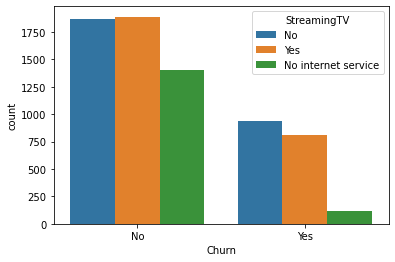

In [59]:
sns.countplot(x='Churn',data=churns, hue='StreamingTV')

<AxesSubplot:xlabel='Churn', ylabel='count'>

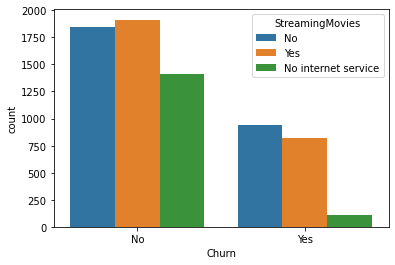

In [60]:
sns.countplot(x='Churn',data=churns, hue='StreamingMovies')

**Services that each customer has signed up for insight:** These features show significant variations across their values. If a customer doesn’t have phone service, they can’t have multiple lines. About 90.3% of the customers have phone services and have a higher rate to churn. Customers who have fibre optic as an internet service are more likely to churn. This can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn. Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn. Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

Time to explore payment features.

<AxesSubplot:xlabel='Contract', ylabel='count'>

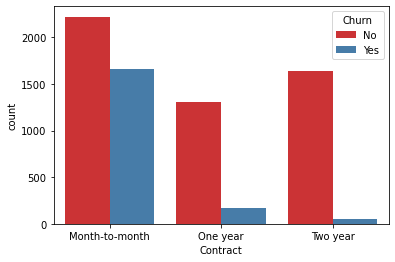

In [62]:
sns.countplot(x='Contract',data=churns, hue='Churn',palette='Set1')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

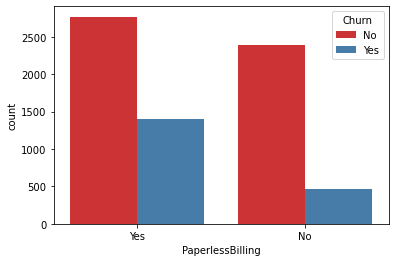

In [65]:
sns.countplot(x='PaperlessBilling',data=churns, hue='Churn',palette='Set1')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

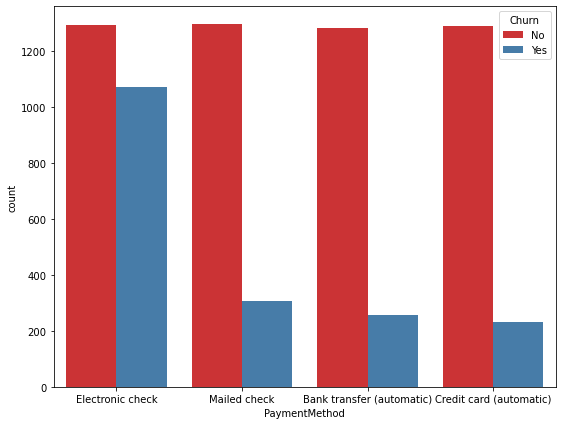

In [70]:
plt.figure(figsize=(9,7))
sns.countplot(x='PaymentMethod',data=churns, hue='Churn',palette='Set1')

**Payment insights:** The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

Now, let’s explore numeric features.

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

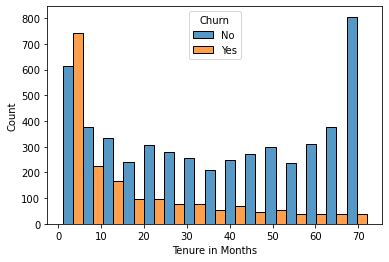

In [72]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = churns, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

The churn amount is higher in the initial 5 months, which is usually the
time when the new customers try out the service and decide whether to
continue or cancel. This pretty much can be attributed to the
uncertainty in the customer’s mind.

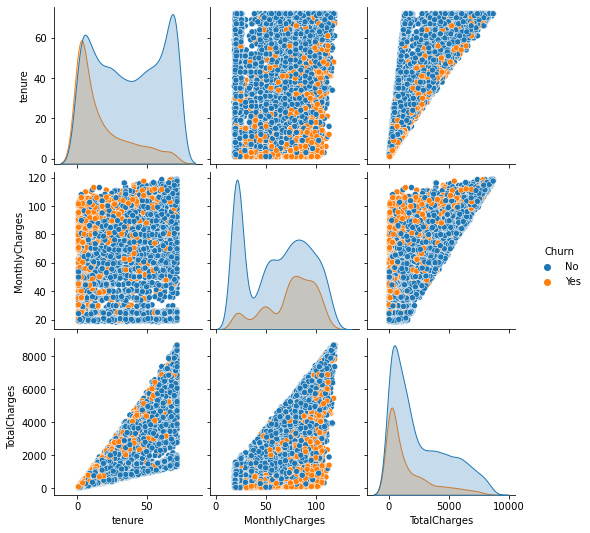

In [73]:
sns.pairplot(churns,hue='Churn')

**Data Preparation**
We need to make sure that the data is in the right form to be used for prediction. Machine Learning models do not work well with categorical inputs. So, we convert the categorical variables in our data set to numerical values by using one-hot encoding.

In [98]:
churns_copy=churns.copy()
churns_copy=pd.get_dummies(churns_copy,drop_first=True)
churns_copy.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X=final_data.drop('Churn_Yes',axis=1)
y=final_data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc=RandomForestClassifier(n_estimators=200)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [112]:
predictions_rfc=rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.49      0.54       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.78      0.79      0.79      2110



## Training the Logistic Regression Model


Now its time to train our model!

**Create an instance of the LogisticRegression class and fit it to our training data from the previous step.**

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr=LogisticRegression()

In [118]:
lr.fit(X_train,y_train)

/Users/peteroroh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
predictions_lr=lr.predict(X_test)

In [120]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



We can standardise the variables before training the model to increase our model's efficiency but at the moment 
**The LogisticRegression Model is more effective**